In [1]:
import pickle
import pandas as pd

with open(r"/email_campaigns.pkl", 'rb') as f:
    data = pickle.load(f)

key = []
for i in data:
  key.append(list(i.keys()))

unique_key = set([j for i in key for j in i])

a = []
for i in data:
  if list(i.keys())[0] in unique_key:
    i_update = list(i.keys())[0]
    for j in i[i_update]:
      a.append(pd.DataFrame([j]))


final_df = pd.concat(a, axis = 0)

In [2]:
final_df = final_df.reset_index()

In [3]:
final_df = final_df.drop(['index','meeting_link_clicked',0],axis = 1)

In [4]:
final_df

,subject,body,opened,meeting link clicked,responded
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False
...,...,...,...,...,...
148,Streamline HR and Boost Performance 💼,"Hello [Recipient's Name],\n\nEfficiency is kin...",True,True,False
149,Boost Your Brand Visibility 🚀,"Hello [Recipient's Name],\n\nWant to skyrocket...",True,False,False
150,🔍 Outpace Competitors with Insightful Analytics,"Hi [Recipient's Name],\n\nI noticed you're nav...",True,False,False
151,Tailored Analytics for You,"Hey [Recipient's Name],\n\nYour brand deserves...",False,False,False


In [5]:
final_df['body'] = final_df['body'].apply(lambda x: str(x).replace('\n',''))

In [6]:
final_df['subject'] = final_df['subject'].apply(lambda x: str(x))
final_df['body'] = final_df['body'].apply(lambda x: str(x))

In [7]:
final_df

,subject,body,opened,meeting link clicked,responded
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],Ready to see your marke...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],I'm reaching out again b...",True,False,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],We haven't connec...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],It's clear that you'r...",True,True,False
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],In the digital age, data...",False,False,False
...,...,...,...,...,...
148,Streamline HR and Boost Performance 💼,"Hello [Recipient's Name],Efficiency is king – ...",True,True,False
149,Boost Your Brand Visibility 🚀,"Hello [Recipient's Name],Want to skyrocket you...",True,False,False
150,🔍 Outpace Competitors with Insightful Analytics,"Hi [Recipient's Name],I noticed you're navigat...",True,False,False
151,Tailored Analytics for You,"Hey [Recipient's Name],Your brand deserves to ...",False,False,False


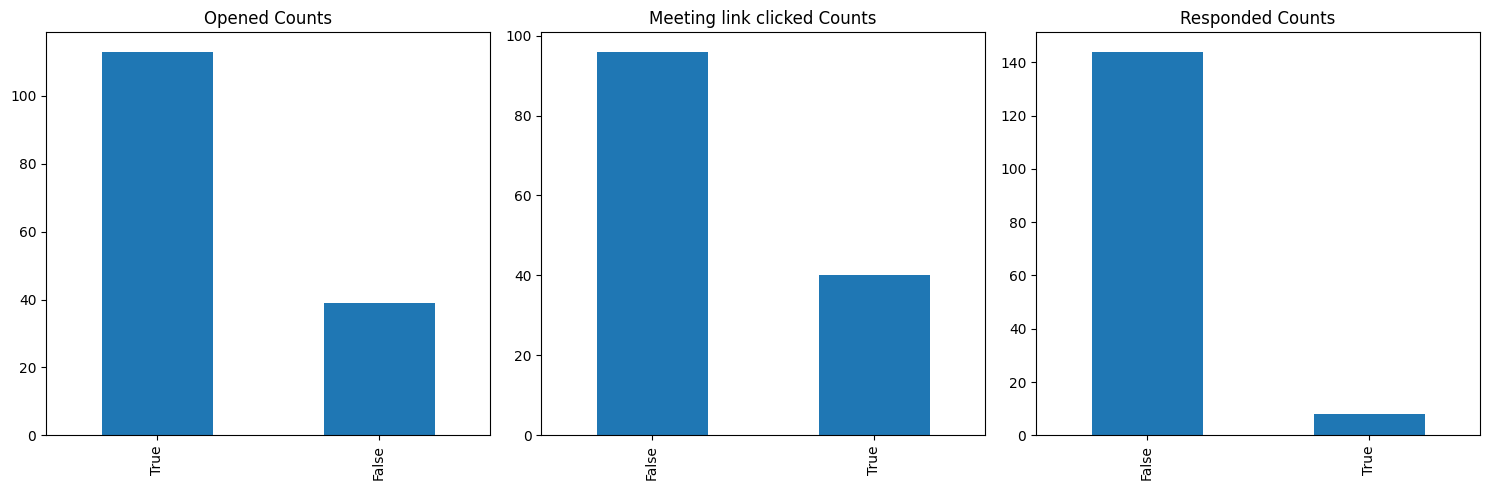

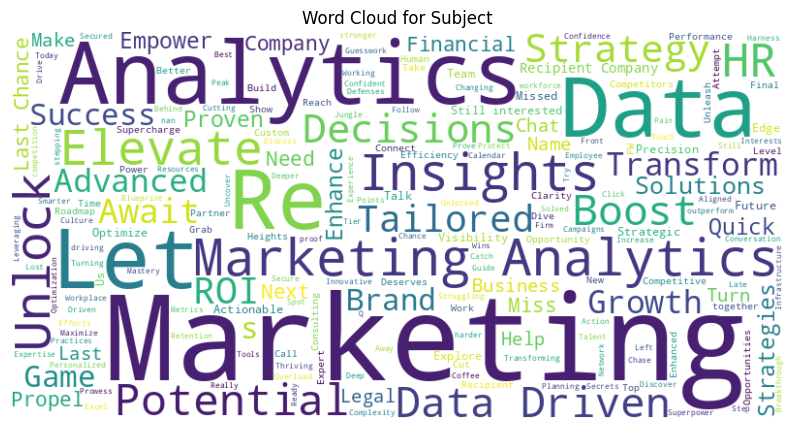

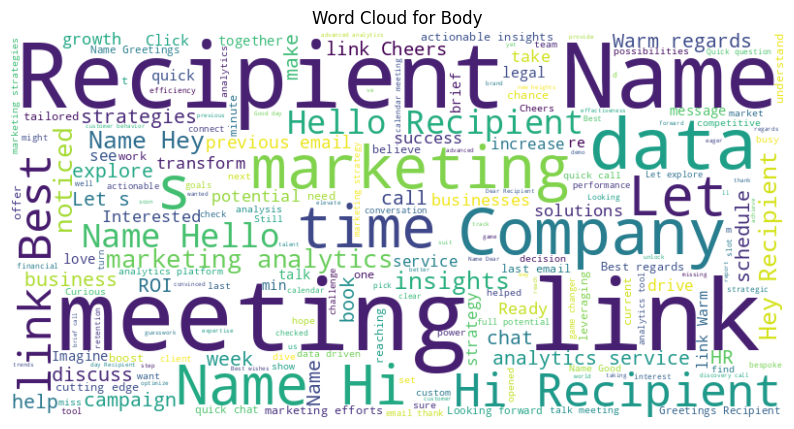

Boolean columns statistics:
       opened meeting link clicked responded
count     152                  136       152
unique      2                    2         2
top      True                False     False
freq      113                   96       144

Text length columns statistics:
       subject_length  body_length
count      153.000000   153.000000
mean        48.660131   349.013072
std         10.565064    79.110598
min          3.000000     3.000000
25%         42.000000   302.000000
50%         50.000000   344.000000
75%         55.000000   394.000000
max         75.000000   617.000000


In [8]:
# Basic statistics for boolean columns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
bool_columns = ['opened', 'meeting link clicked', 'responded']
bool_stats = final_df[bool_columns].describe()

# Visualizing counts of boolean columns
fig, axes = plt.subplots(1, len(bool_columns), figsize=(15, 5))
for i, col in enumerate(bool_columns):
    final_df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Counts')

plt.tight_layout()
plt.show()

# Analyzing text-based columns
text_columns = ['subject', 'body']
for col in text_columns:
    # Calculate text length
    final_df[f'{col}_length'] = final_df[col].apply(lambda x: len(str(x)))

    # Word cloud for text columns
    text = ' '.join(final_df[col].tolist())
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {col.capitalize()}')
    plt.axis('off')
    plt.show()

# Summary statistics for text lengths
text_length_stats = final_df[[col for col in final_df.columns if 'length' in col]].describe()

print("Boolean columns statistics:")
print(bool_stats)
print("\nText length columns statistics:")
print(text_length_stats)

In [9]:
# Check for missing values
missing_values = final_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handling missing values by filling with a default value or dropping rows/columns
# For example, filling missing text with an empty string
final_df['subject'].fillna('', inplace=True)
final_df['body'].fillna('', inplace=True)


Missing Values:
subject                  0
body                     0
opened                   1
meeting link clicked    17
responded                1
subject_length           0
body_length              0
dtype: int64


In [10]:
# Assuming 'email_data' is your DataFrame
missing_values = {
    'opened': 1,
    'meeting link clicked': 17,
    'responded': 1
}

# Fill missing values with mode
for col, value in missing_values.items():
    mode_value = final_df[col].mode()[0]  # Get the mode
    final_df[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Verify that missing values have been filled
missing_values_after_filling = final_df.isnull().sum()
print("Missing Values after filling:")
print(missing_values_after_filling)


Missing Values after filling:
subject                 0
body                    0
opened                  0
meeting link clicked    0
responded               0
subject_length          0
body_length             0
dtype: int64


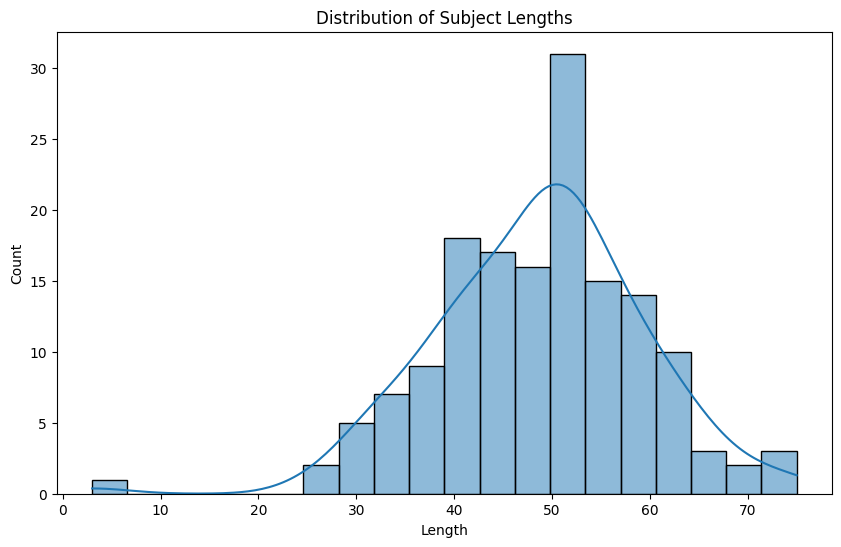

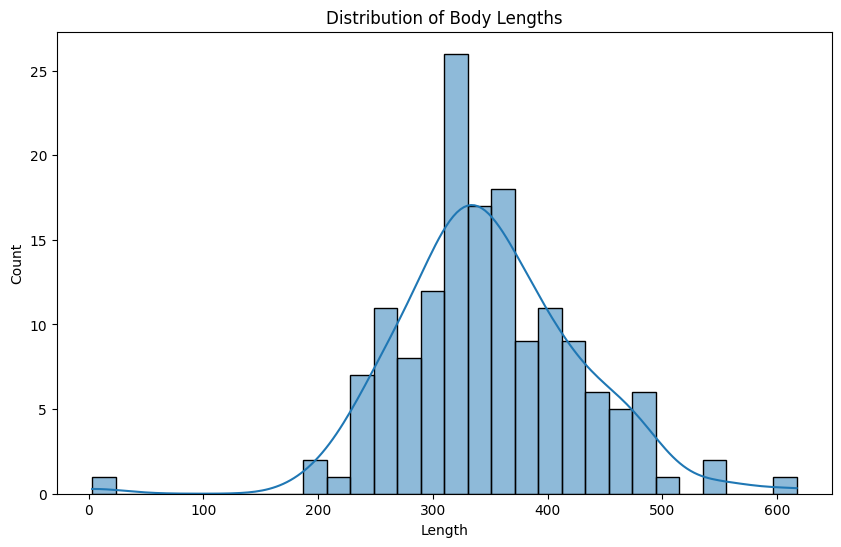

In [11]:
# Distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='subject_length', bins=20, kde=True)
plt.title('Distribution of Subject Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='body_length', bins=30, kde=True)
plt.title('Distribution of Body Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


In [12]:
# Summary statistics for text lengths
text_length_stats = final_df[['subject_length', 'body_length']].describe()
print("Text Lengths Summary Statistics:")
print(text_length_stats)


Text Lengths Summary Statistics:
       subject_length  body_length
count      153.000000   153.000000
mean        48.660131   349.013072
std         10.565064    79.110598
min          3.000000     3.000000
25%         42.000000   302.000000
50%         50.000000   344.000000
75%         55.000000   394.000000
max         75.000000   617.000000


In [13]:
# Summary statistics for boolean columns
bool_summary = final_df[['opened', 'meeting link clicked', 'responded']].describe()
print("Summary Statistics for Boolean Columns:")
print(bool_summary)


Summary Statistics for Boolean Columns:
       opened meeting link clicked responded
count     153                  153       153
unique      2                    2         2
top      True                False     False
freq      114                  113       145


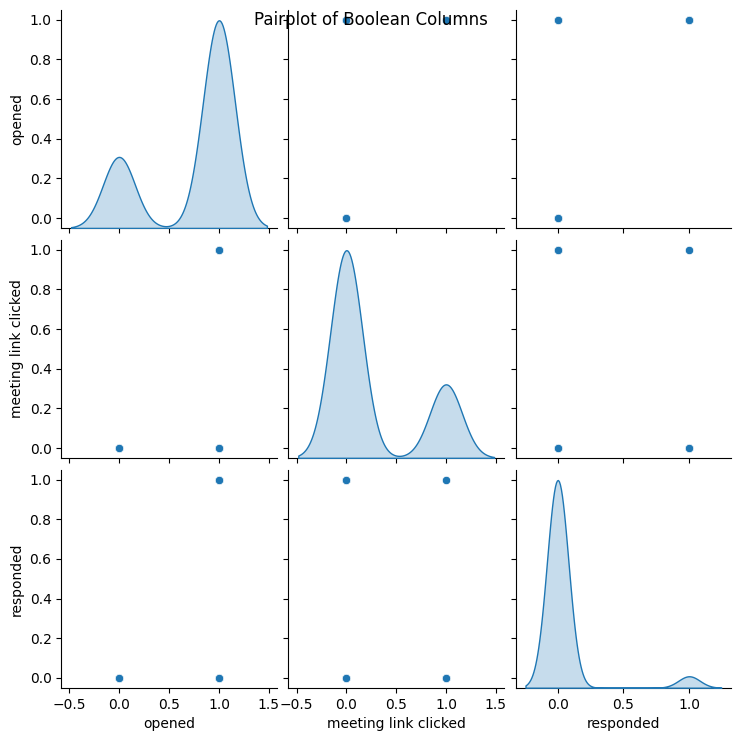

In [14]:
# Pairplot to visualize relationships between boolean columns
sns.pairplot(final_df[['opened', 'meeting link clicked', 'responded']], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Boolean Columns')
plt.show()


#Insights to Explore:

Engagement Rate: Calculate and compare engagement rates (opened, link clicked, responded) based on different factors (time of sending, type of content, etc.).


Conversion Rate: Analyze the funnel from opened to link clicked to responded to understand the conversion rates and potential drop-offs.


Content Analysis: Explore whether certain types of subjects or body content lead to higher engagement rates.


Time Analysis: Analyze engagement rates over time (day of the week, hour of the day) to identify the best times for higher engagement.

In [15]:
final_df.columns

Index(['subject', 'body', 'opened', 'meeting link clicked', 'responded',
       'subject_length', 'body_length'],
      dtype='object')

#Develop a machine learning model to predict the likelihood of email engagement (open rates or link clicks) based on the features available in the dataset.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'email_data' is your DataFrame containing the 'subject' and 'body' columns

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=248)  # You can adjust max_features as needed

# Fit and transform 'subject' and 'body' columns
tfidf_subject = tfidf_vectorizer.fit_transform(final_df['subject'].fillna(''))
tfidf_body = tfidf_vectorizer.fit_transform(final_df['body'].fillna(''))

# Convert TF-IDF matrices into DataFrame and concatenate with the original data
tfidf_subject_df = pd.DataFrame(tfidf_subject.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_body_df = pd.DataFrame(tfidf_body.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
email_data_processed = pd.concat([final_df, tfidf_subject_df, tfidf_body_df], axis=1)

# Drop the original text columns
email_data_processed.drop(['subject', 'body'], axis=1, inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert boolean object columns to numerical values
email_data_processed['meeting link clicked'] = label_encoder.fit_transform(email_data_processed['meeting link clicked'])
email_data_processed['responded'] = label_encoder.fit_transform(email_data_processed['responded'])


In [19]:
email_data_processed

,opened,meeting link clicked,responded,subject_length,body_length,15,20,30,about,achieve,...,when,where,wishes,with,works,world,would,you,your,yours
0,False,0,0,52,330,0.0,0.0,0.0,0.496438,0.0,...,0.000000,0.0,0.000000,0.118091,0.0,0.0,0.0,0.073022,0.238448,0.000000
1,True,0,0,49,393,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.111880,0.0,0.0,0.0,0.069181,0.225906,0.000000
2,False,0,0,54,474,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.068330,0.223126,0.000000
3,True,1,0,56,401,0.0,0.0,0.0,0.000000,0.0,...,0.191177,0.0,0.000000,0.104749,0.0,0.0,0.0,0.194315,0.211508,0.000000
4,False,0,0,74,427,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.115827,0.425504,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,True,1,0,37,269,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.134063,0.0,0.0,0.0,0.000000,0.203023,0.000000
149,True,0,0,29,253,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.301769,0.000000,0.0,0.0,0.0,0.096898,0.158206,0.000000
150,True,0,0,47,265,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.087582,0.071498,0.000000
151,False,0,0,26,340,0.0,0.0,0.0,0.000000,0.0,...,0.224647,0.0,0.000000,0.123088,0.0,0.0,0.0,0.076112,0.186403,0.000000


In [22]:
email_data_processed = email_data_processed.loc[:, ~email_data_processed.columns.duplicated()]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'email_data' is your preprocessed DataFrame with features and target ('opened' column)

# Define features (X) and target variable (y)
X = email_data_processed.iloc[1:]  # Add relevant features
y = email_data_processed['opened']  # Target variable
y.drop(y.tail(1).index,inplace=True)



<ipython-input-37-375c25b7165c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(y.tail(1).index,inplace=True)


In [38]:
y

0      False
1       True
2      False
3       True
4      False
       ...  
147    False
148     True
149     True
150     True
151    False
Name: opened, Length: 152, dtype: object

In [39]:
label_encoder = LabelEncoder()

# Convert boolean object columns to numerical values
y = label_encoder.fit_transform(y)

In [40]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.75      0.95      0.84        22

    accuracy                           0.74        31
   macro avg       0.71      0.59      0.59        31
weighted avg       0.73      0.74      0.69        31



##From the provided classification report, here's the analysis of the model's performance:

**Model** Performance Metrics

Accuracy: 74%

Precision:

Precision for 'not opened' (Class 0): 67%

Precision for 'opened' (Class 1): 75%

Recall:

Recall for 'not opened' (Class 0): 22%

Recall for 'opened' (Class 1): 95%

F1-Score:

F1-Score for 'not opened' (Class 0): 33%

F1-Score for 'opened' (Class 1): 84%

Interpretation:

Accuracy (Overall Model Performance):


The model correctly predicts approximately 74% of the instances.

It indicates that the model's predictions are accurate for about 74% of the test set.

Precision:


For 'opened' emails (Class 1), the precision is 75%, meaning 75% of the predicted 'opened' emails are correctly classified.
For 'not opened' emails (Class 0), the precision is 67%, indicating 67% of the predicted 'not opened' emails are correct.

Recall (Sensitivity):


For 'opened' emails (Class 1), the recall is 95%, implying the model effectively captures 95% of the actual 'opened' emails.
For 'not opened' emails (Class 0), the recall is 22%, suggesting the model captures only 22% of the actual 'not opened' emails.

F1-Score:


The F1-score balances precision and recall. The F1-score for 'opened' emails (Class 1) is relatively high at 84%, indicating a good balance between precision and recall for this class. However, for 'not opened' emails (Class 0), the F1-score is lower at 33%, suggesting a trade-off between precision and recall.

Summary:

The model performs well in predicting 'opened' emails (Class 1) with high precision and recall.

However, for 'not opened' emails (Class 0), the model has lower precision and recall, indicating that it struggles to correctly identify 'not opened' instances.

**Recommendations**:

Focus on improving the model's ability to correctly identify 'not opened' emails by potentially balancing the trade-off between precision and recall.
Consider feature engineering or exploring different algorithms that might better capture the patterns in 'not opened' emails to improve overall model performance.

##Documenting in Jupyter Notebook

Open Jupyter Notebook and create a new notebook.

Add markdown cells to describe each step, explaining what the code is doing.

Include code cells with the actual code from the above steps.

Use markdown cells for explanations, comments, and interpretations of results.

Insert visualizations (if applicable) to illustrate findings or model
performance.

Save the notebook with appropriate headings and descriptions.